In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from pandas.api.types import CategoricalDtype
import glob

sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")

def LoadData(base_dirs):
    search_string="*.csv"
    dall = []
    for eval_dir in base_dirs:
        for filename in glob.glob(eval_dir+search_string, recursive=True):
            print(filename)
            dd = pd.read_csv(filename, index_col=None, header=0, skipinitialspace=True)
            #print(dd)
            dall.append(dd)
        dg = pd.concat(dall, axis=0, ignore_index=True)
    return dg
   
###### LOAD DATA ############
#baseline='/home/daniel/rosbag/CFEAR_EVAL/clean_baseline_multi_2022-03-16_1529'
improvement='./data/'
dirs=[improvement]

df=LoadData(dirs)

#method_dir='oxford-cfear3-p2l_2022-02-15_1651/oxford-cfear3-p2l_2022-02-15_1651_eval.csv'

#print(df)
# ($\mathbf{W}_j=\frac{1}{l}$, $w=1$)"
method=[r"Uni. cov. & resid", r"Adj. cov ($\mathbf{W}_j=z_j-z_{min}$)", r"Detections ($w^{det}$)", r"Normals($w^{dir}$)", r"Planarity ($w^{plan}$)", r"Combined ($w$)"] #r"combined ($w=w^{plan}+w^{dir}+w^{det}$)
df = df.rename(columns={'resolution r': 'resolution r [m]'})
df['for_copy'] = df.apply (lambda row: "{:2.2f}".format(row["Trans.err.(%)"])+"/"+"{:2.2f}".format(row["Rot.err.(deg/100m)"]) , axis=1)
df['for_copy_ATE'] = df.apply (lambda row: "{:2.2f}".format(row["RPE(m)"])+"/"+"{:2.2f}".format(row["ATE(m)"]) , axis=1)
df['Weight'] = df.apply (lambda row: row["Weight"]+1, axis=1) #Increment by 1
df['Weight'].mask( (df['Weight'] == 1) & (df['weight intensity'] == False), 0, inplace=True) #Insert 0
df['Weighting'] = df.apply (lambda row: method[row["Weight"]] , axis=1)
df.to_csv('out.csv')

#r" ($\mathbf{W}=1/l\mathbf{I}$)",

df['RPE [cm]'] = df.apply (lambda row: 100*row["RPE(m)"] , axis=1)
df = df.rename(columns={'Trans.err.(%)': 'Transl. Error[%]'})
df = df.rename(columns={'Rot.err.(deg/100m)': 'Rot. Error[deg/100m]'})
#print(df["sequence"])
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

df.head()
print("before: ")
print(df.shape[0])
df=df[ (df["weight intensity"]==True) | (df['Weight']== 0) ] 
#df['weight'] = np.where( (df['weight intensity']==True)&(df['weight']==0), "value_if_true", value_if_false)



#df['weight'] = df.apply (lambda row: method[row["Weight"]] , axis=1)
print(df.shape[0])


./data/cfear-3_2022-05-17_1008_eval.csv
./data/cfear3_2022-05-17_0918_eval.csv
./data/cfear1_2022-05-17_0850_eval.csv
./data/cfear2_2022-05-17_0902_eval.csv
./data/cfear-1_2022-05-17_0954_eval.csv
./data/cfear-2_2022-05-17_1000_eval.csv
before: 
510
306


In [2]:
####  OR     ####
####  OXFORD ####
df=df[df["dataset"]=="oxford"]
df['sequence'] = df.apply (lambda row: str(row["sequence"])[8:-20], axis=1)
cat_size_order = CategoricalDtype(
    ["10-12-32", "16-13-09", "17-13-26", "18-14-14", "18-15-20", "16-11-53", "10-11-46","18-14-46"], 
    ordered=True
)
df['sequence'] = df["sequence"].astype(cat_size_order)
df=df.sort_values(['sequence','method', 'Weight'])
##############################


      

In [3]:
sns.set_context("paper", font_scale=1.5,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15,"axes.ylabel":15})   

methods=["cfear1", "cfear2", "cfear3", "cfear-1", "cfear-2", "cfear-3",]
#methods=["cfear-1"]
#print(df["method"])
print("\n-----------------------------------------------")
for method in methods:
    dfm=df[df["method"]==method]
    if(dfm.shape[0]>0):
        trans_mean = "{:2.2f}".format(dfm["Transl. Error[%]"].mean())
        rot_mean = "{:2.2f}".format(dfm["Rot. Error[deg/100m]"].mean())
        print(method+ ": odometry error: "+" & ".join(dfm["for_copy"].values) + ", mean: " + trans_mean + "/" + rot_mean)
print("-----------------------------------------------\n")
for method in methods:
    dfm=df[df["method"]==method]
    if(dfm.shape[0]>0):
        ate_mean = "{:2.2f}".format(dfm["ATE(m)"].mean())
        rpe_mean = "{:2.2f}".format(dfm["RPE(m)"].mean())
        print(method+ ": RPE/ATE: " + " & ".join(dfm["for_copy_ATE"].values) + ", mean: " + rpe_mean + "/" + ate_mean)
        


-----------------------------------------------
cfear1: odometry error: 1.65/0.59 & 1.59/0.57 & 1.52/0.53 & 1.49/0.53 & 1.60/0.58 & 1.51/0.54 & 1.95/0.68 & 1.95/0.67 & 1.90/0.65 & 1.79/0.62 & 1.82/0.62 & 1.83/0.63 & 1.93/0.66 & 1.94/0.67 & 1.85/0.65 & 1.68/0.59 & 1.89/0.64 & 1.73/0.61 & 1.86/0.61 & 1.83/0.61 & 1.79/0.60 & 1.93/0.65 & 1.75/0.60 & 1.75/0.59 & 1.77/0.60 & 1.79/0.62 & 1.70/0.59 & 1.75/0.61 & 1.71/0.60 & 1.66/0.58 & 2.23/0.68 & 2.10/0.62 & 2.08/0.62 & 2.07/0.61 & 1.95/0.59 & 2.00/0.59 & 1.87/0.61 & 1.79/0.60 & 1.77/0.59 & 1.64/0.60 & 1.70/0.58 & 1.70/0.59 & 1.79/0.56 & 1.85/0.58 & 1.78/0.56 & 1.71/0.54 & 1.80/0.57 & 1.73/0.55, mean: 1.80/0.60
cfear2: odometry error: 1.32/0.48 & 1.28/0.48 & 1.28/0.47 & 1.30/0.49 & 1.33/0.49 & 1.32/0.49 & 1.53/0.53 & 1.49/0.52 & 1.47/0.50 & 1.47/0.50 & 1.45/0.50 & 1.46/0.50 & 1.59/0.56 & 1.51/0.53 & 1.43/0.50 & 1.41/0.51 & 1.53/0.54 & 1.44/0.51 & 1.53/0.52 & 1.48/0.50 & 1.44/0.49 & 1.54/0.52 & 1.45/0.50 & 1.47/0.50 & 1.40/0.49 & 1.44/0.51 & 

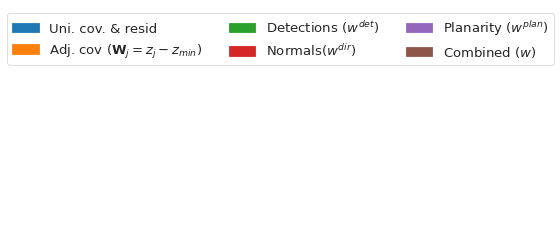

In [4]:

dfs=df[df["method"]!="cfear2"]
col=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

pal=sns.color_palette(col)
sns.set_palette(pal)

#fig, axes = plt.figure(1, 1, sharex=False, figsize=(10,5))
fig, ax = plt.subplots()


fig.patch.set_visible(False)
ax.axis('off')
#print(d)
weights=df["Weighting"].unique()

import matplotlib.patches as mpatches
handless=[]
i=0
for w in weights:
    patch = mpatches.Patch( label=w,color=col[i])
    handless.append(patch)
    i=i+1


plt.legend(handles=handless, loc='upper center',ncol=3)
plt.savefig('output/legend.pdf',format="pdf",bbox_inches='tight')
plt.show()

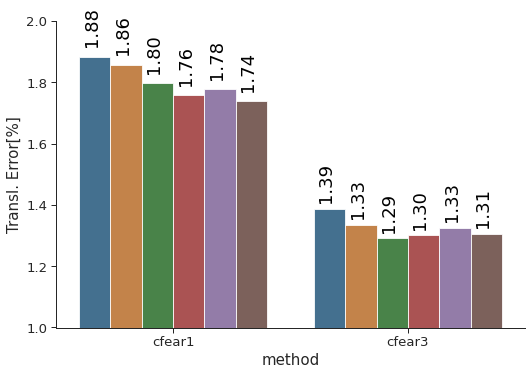

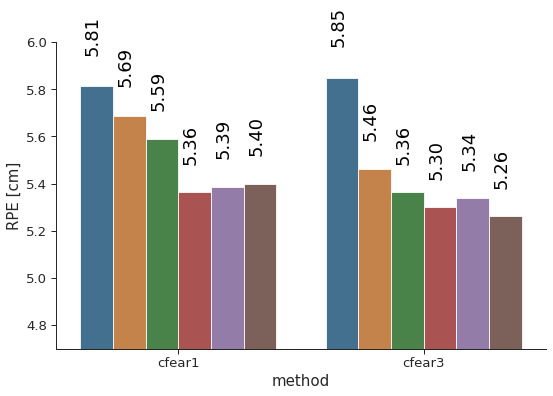

In [12]:
dfs=df[df["method"]!="cfear2"]
g = sns.catplot(x="method", y="Transl. Error[%]",hue="Weighting",
                data=dfs, saturation=.5,legend=False,legend_out=False,
                kind="bar", ci=None, aspect=1.5,palette=pal)
    
plt.ylim(1, 2)
#plt.legend(loc='lower left',framealpha=0.95,ncol=2,fontsize=13)
g.set_xticklabels(rotation=0)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.025, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='vertical', fontsize=18)
plt.savefig('output/transl_error_2.png',bbox_inches='tight')
plt.savefig('output/transl_error_2.pdf',format="pdf",bbox_inches='tight')




g = sns.catplot(x="method", y="RPE [cm]",hue="Weighting",legend=False,legend_out=False,
                data=dfs, saturation=.5,
                kind="bar", ci=None, aspect=1.5,palette=pal)
#plt.legend(loc='lower left',framealpha=0.9,ncol=2)
g.set_xticklabels(rotation=0)
plt.ylim(4.7, 6) 
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.025, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='vertical', fontsize=18)
plt.savefig('output/rpe_error_2.png',bbox_inches='tight')
plt.savefig('output/rpe_error_2.pdf',format="pdf",bbox_inches='tight')


#g = sns.catplot(x="method", y="RPE(deg)",hue="Weighting",legend=True,legend_out=False,
#                data=df, saturation=.5,
#                kind="bar", ci=None, aspect=1.2)
#plt.legend(loc='lower left',framealpha=0.9,ncol=2)
#g.set_xticklabels(rotation=0)
#ax = g.facet_axis(0,0)
#for p in ax.patches:
#    ax.text(p.get_x() + 0.015, 
#            p.get_height() * 1.025, 
#            '{0:.2f}'.format(p.get_height()), 
#            color='black', rotation='vertical', fontsize=16)

/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "palette" which is no longer supported as of 3.3 and will become an error two minor releases later


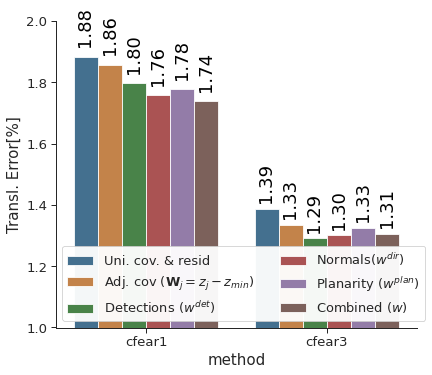

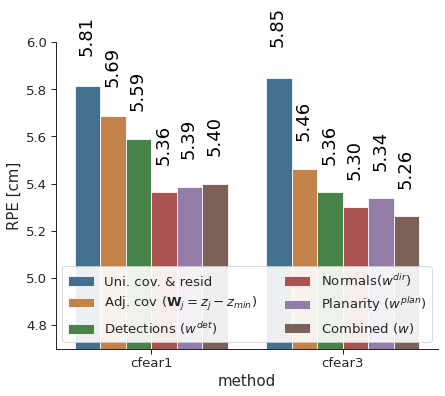

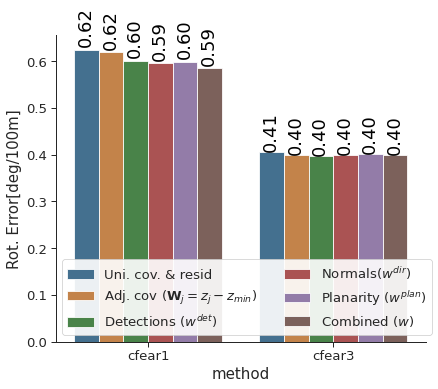

In [6]:
df=df[df["method"]!="cfear2"]
g = sns.catplot(x="method", y="Transl. Error[%]",hue="Weighting",
                data=dfs, saturation=.5,legend=False,legend_out=False,
                kind="bar", ci=None, aspect=1.2,palette=pal)
    
plt.ylim(1, 2)
plt.legend(loc='lower left',framealpha=0.95,ncol=2,fontsize=13)
g.set_xticklabels(rotation=0)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.025, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='vertical', fontsize=18)
plt.savefig('output/transl_error.png',bbox_inches='tight')
plt.savefig('output/transl_error.pdf',format="pdf",bbox_inches='tight')




g = sns.catplot(x="method", y="RPE [cm]",hue="Weighting",legend=False,legend_out=False,
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1.2,palette=pal)
plt.legend(loc='lower left',framealpha=0.9,ncol=2)
g.set_xticklabels(rotation=0)
plt.ylim(4.7, 6) 
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.025, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='vertical', fontsize=18)
plt.savefig('output/rpe_error.png',bbox_inches='tight')
plt.savefig('output/rpe_error.pdf',format="pdf",bbox_inches='tight')



g = sns.catplot(x="method", y="Rot. Error[deg/100m]",hue="Weighting",legend=False,legend_out=False,
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=1.2,palette=pal)
plt.legend(loc='lower left',framealpha=0.9,ncol=2)


g.set_xticklabels(rotation=0)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.025, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='vertical', fontsize=18)
plt.savefig('output/rot_error.png',bbox_inches='tight')
plt.savefig('output/rot_error.pdf',format="pdf",bbox_inches='tight',palette=pal)
    
#g = sns.catplot(x="method", y="RPE(deg)",hue="Weighting",legend=True,legend_out=False,
#                data=df, saturation=.5,
#                kind="bar", ci=None, aspect=1.2)
#plt.legend(loc='lower left',framealpha=0.9,ncol=2)
#g.set_xticklabels(rotation=0)
#ax = g.facet_axis(0,0)
#for p in ax.patches:
#    ax.text(p.get_x() + 0.015, 
#            p.get_height() * 1.025, 
#            '{0:.2f}'.format(p.get_height()), 
#            color='black', rotation='vertical', fontsize=16)